Based on example in databookuw.com Chapter 5 Sec 3.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

In [2]:
# Training and testing set sizes
n1 = 100 # Train
n2 = 50  # Test

# Random ellipse 1 centered at (0,0)
x = np.random.randn(n1+n2)
y = 0.5*np.random.randn(n1+n2)

# Random ellipse 2 centered at (1,-2)
x2 = np.random.randn(n1+n2) + 1
y2 = 0.2*np.random.randn(n1+n2) - 2

# Rotate ellipse 2 by theta
theta = np.pi/4
A = np.zeros((2,2))
A[0,0] = np.cos(theta)
A[0,1] = -np.sin(theta)
A[1,0] = np.sin(theta)
A[1,1] = np.cos(theta)

x3 = A[0,0]*x2 + A[0,1]*y2
y3 = A[1,0]*x2 + A[1,1]*y2

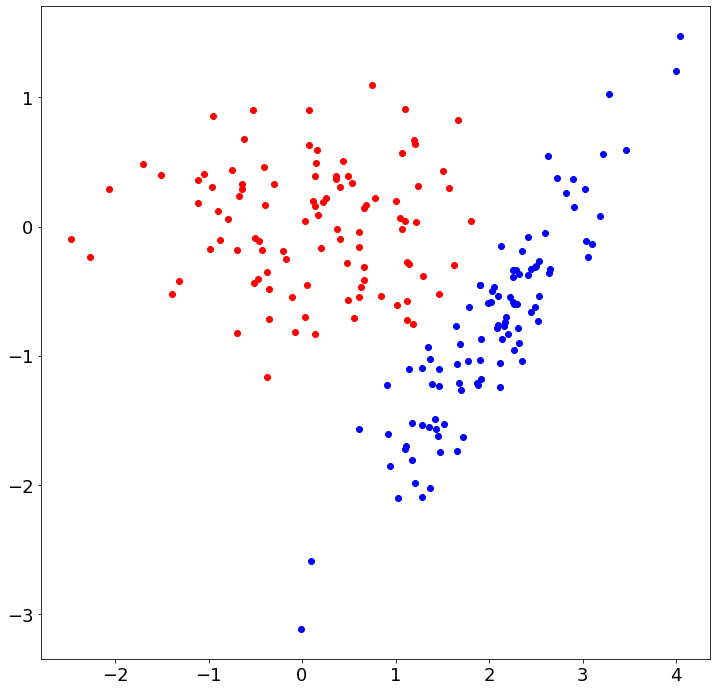

In [3]:
plt.figure()
plt.plot(x[:n1],y[:n1],'ro')
plt.plot(x3[:n1],y3[:n1],'bo')
plt.show()

In [4]:
# Training set: first 200 of 240 points
X1 = np.column_stack((x3[:n1],y3[:n1]))
X2 = np.column_stack((x[:n1],y[:n1]))

Y = np.concatenate((X1,X2))
Z = np.column_stack((np.ones(n1),2*np.ones(n1)))

# Test set: remaining 40 points
x1test = np.column_stack((x3[n1:],y3[n1:]))
x2test = np.column_stack((x[n1:],y[n1:]))


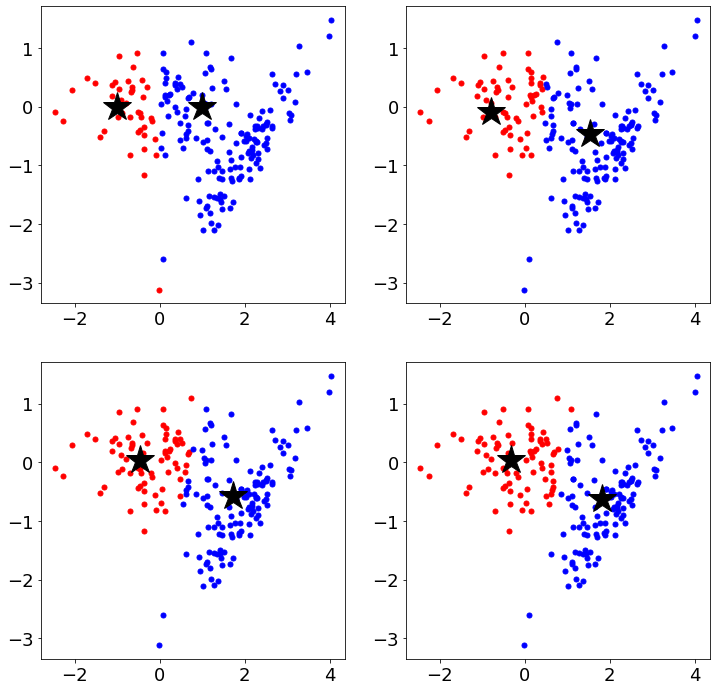

In [5]:
g1 = np.array([-1, 0]) # Initial guess
g2 = np.array([1, 0])
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
for j in range(4):
    class1 = np.zeros((1,2))
    class2 = np.zeros((1,2))
    for jj in range(Y.shape[0]):
        d1 = np.linalg.norm(g1-Y[jj,:],ord=2)
        d2 = np.linalg.norm(g2-Y[jj,:],ord=2)
        if d1<d2:
            class1 = np.append(class1,Y[jj,:].reshape((1,2)),axis=0)
        else:
            class2 = np.append(class2,Y[jj,:].reshape((1,2)),axis=0)
    class1 = np.delete(class1, (0), axis=0) # remove zeros used to initialize
    class2 = np.delete(class2, (0), axis=0)
    
    axs[j].plot(class1[:,0],class1[:,1],'ro',ms=5)
    axs[j].plot(class2[:,0],class2[:,1],'bo',ms=5)
    axs[j].plot(g1[0],g1[1],'k*',ms=30)
    axs[j].plot(g2[0],g2[1],'k*',ms=30)
    
    g1 = np.array([np.mean(class1[:,0]),np.mean(class1[:,1])])
    g2 = np.array([np.mean(class2[:,0]),np.mean(class2[:,1])])
    
plt.show()